In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from astropy.table import Table
from astropy.modeling import models
from keckcode_test.keckcode.esiredux import esi2d
from specim_test.specim.specfuncs import spec2d
from specim.specfuncs import spec1d, specset1d

In [2]:
file_loc = '../galaxy_spectra/ESI_data/*'

In [3]:
spec2d_file_list = []
var2d_file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'J0924' in p:
        if 'bgsub.fits' in p:
            spec2d_file_list.append(p)
        elif 'var.fits' in p:
            var2d_file_list.append(p)
            #frame = p.split('_')[-3][:4]
            #out_file.append('0053m1_r'+ frame + '_cleaned.fits')
        #print(p)

In [4]:
spec = esi2d.Esi2d(spec2d_file_list[2], varfile=var2d_file_list[2])

Order  Shape    Dispaxis
----- --------- --------
  1   3461x165     x
  2   4093x145     x
  3   4096x146     x
  4   4096x141     x
  5   4096x130     x
  6   4096x127     x
  7   4096x124     x
  8   4096x121     x
  9   4096x117     x
 10   4096x111     x


No valid WCS information in image header
 CTYPE keys are not RA/DEC
   Cutout data in section [xrange,yrange]:  [0:4096,0:1777]
   Cutout image center (x, y): (2048, 888)
   Cutout image size (x y): 4096x1777

Calculating display limits
--------------------------
 Clipped mean: 0.436239
 Clipped rms:  5.689673
 fmin (mean -   1 sigma):  -5.253434
 fmax (mean +  10 sigma):  57.332965


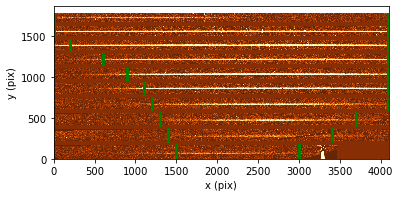

In [5]:
spec.plot_2d()

Plotting spatial profiles
-------------------------
Profile max value (before normalization) 67.908516
Profile max value (before normalization) 106.945737
Profile max value (before normalization) 160.785469
Profile max value (before normalization) 188.249063
Profile max value (before normalization) 228.350195
Profile max value (before normalization) 261.833365
Profile max value (before normalization) 285.537949
Profile max value (before normalization) 287.925530
Profile max value (before normalization) 233.573473
Profile max value (before normalization) 30.823518


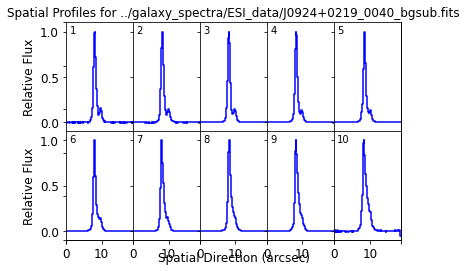

In [6]:
#%matplotlib notebook
spec.plot_profiles()

Profile max value (before normalization) 113.303938


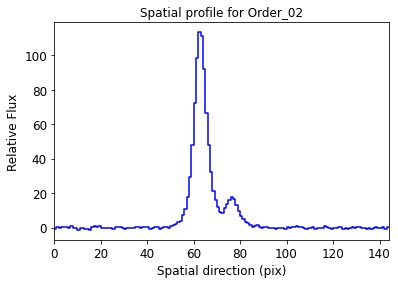


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 3
Number of Moffat profile : 0

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 120, 63, 2

amplitude=120.000000, mu=63.000000, sigma=2.000000

Parameters of Gaussian profile 2 : 20, 69, 2

amplitude=20.000000, mu=69.000000, sigma=2.000000

Parameters of Gaussian profile 3 : 20, 76, 2

amplitude=20.000000, mu=76.000000, sigma=2.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=0.10473203)>

    [1]: <Gaussian1D(amplitude=111.94289849, mean=63.36021801, stddev=2.6561109)>

    [2]: <Gaussian

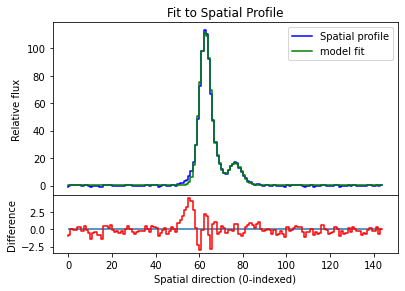

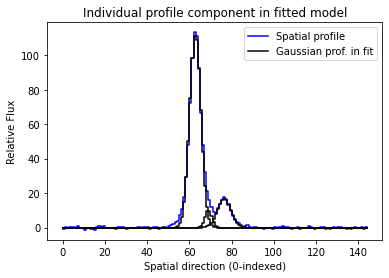


Do you want to start over ? : type yes/no
no


In [7]:
pixrange = [(1900, 2400)] #(1900, 2400)
sp_list = [spec[1], spec[2], spec[5],spec[6], spec[8], spec[9]]
sp_info = [spec.ordinfo[1], spec.ordinfo[2], spec.ordinfo[5], spec.ordinfo[6], spec.ordinfo[8],
          spec.ordinfo[9]]
for sp, info in zip(sp_list[0:1], sp_info[0:1]):
    title = 'Spatial profile for ' + str(info['name'])
    sp.spatial_profile(pixrange=pixrange[0], title=title)
    plt.show()
    sp.initial_model()


Extracting spectra
------------------
Order_01
Order_02


Fitting polynomial of degree 2 to parameter: c0_0
Fitting polynomial of degree 2 to parameter: mean_1
Fitting polynomial of degree 2 to parameter: stddev_1
Fitting polynomial of degree 2 to parameter: mean_2
Fitting polynomial of degree 2 to parameter: stddev_2
Fitting polynomial of degree 2 to parameter: mean_3
Fitting polynomial of degree 2 to parameter: stddev_3


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

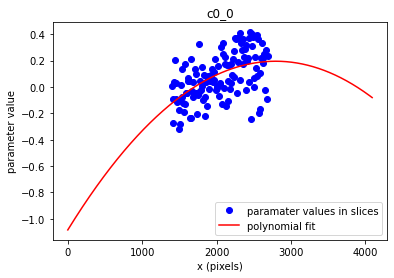

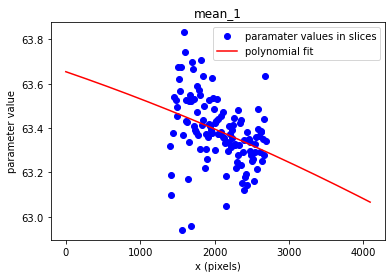

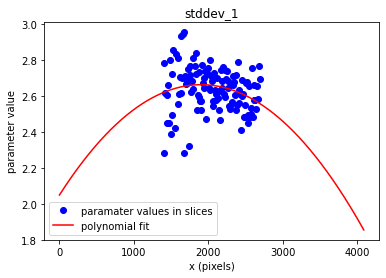

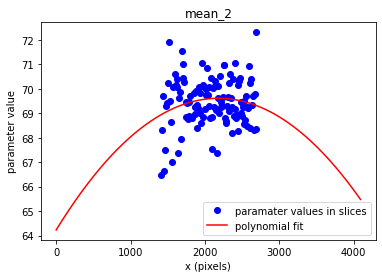

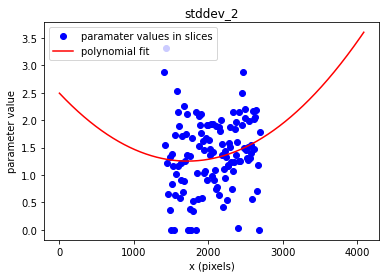

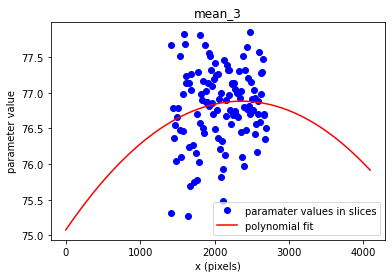

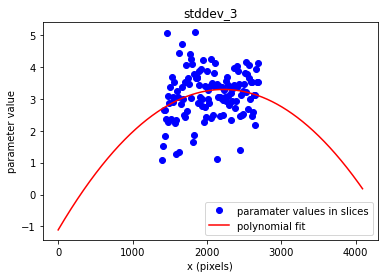

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 1400 - 2700
Fitting to the trace at 4093 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  4240.70
 Spectrum End:     4455.24
 Dispersion (1st pixel):   0.16
 Dispersion (average):      0.17

 Spectrum Start:  4240.70
 Spectrum End:     4455.24
 Dispersion (1st pixel):   0.16
 Dispersion (average):      0.17

 Spectrum Start:  4240.70
 Spectrum End:     4455.24
 Dispersion (1st pixel):   0.16
 Dispersion (average):      0.17


Plotting the spectrum
Order_03
Order_04
Order_05
Order_06
Order_07
Order_08
Order_09
Order_10



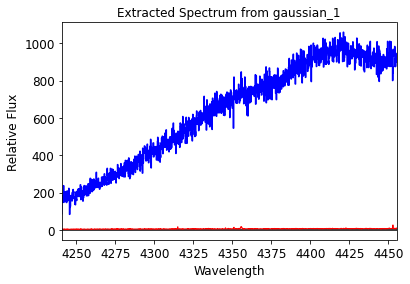

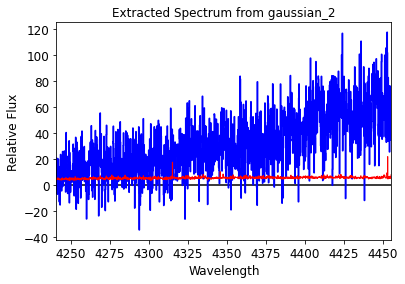

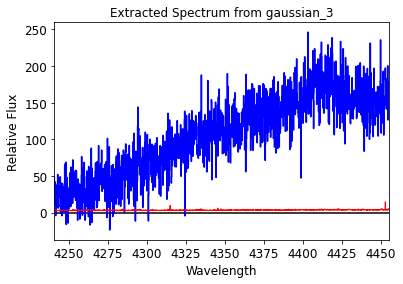

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
outspec = spec.extract_all(method='cdf', plot_profiles=False, plot_traces=True, plot_extracted=False,
                          stepsize=10, fit_dict = {2 : [1400, 2700]})

In [ ]:
print(spec[2].spectra[0][1]['flux'][1000:1020])

In [ ]:
spec[2].covar[2300:2320]

In [ ]:
print(spec[2].spectra[1][1]['flux'][1000:1020])

In [ ]:
spec[1].fitpars['amplitude_3'][280:300]

In [ ]:
spec[2].flux['gaussian_1'][2300:2320]

In [ ]:
spec[2].fitpars['stddev_1'][2300:2320]

In [ ]:
spec[2].vardata[:, 2310:2311]

In [ ]:
neg = (spec[2].vardata < 0) | (np.isnan(spec[2].vardata)) 

In [ ]:
np.transpose(np.where(neg==True))

In [ ]:
(neg*1).sum()

In [ ]:
neg.shape

In [ ]:
spec[2].vardata.argmin()

In [ ]:
np.diag(spec[2].covar[100])

In [ ]:
p = spec[1].covar
#np.diag(p)
p

In [ ]:
var_list = []
mod_var = []
ncomp = spec[1].mod0.n_submodels - 1
for i, p in enumerate(spec[1].covar[250:290]):
    if p is None:
        print(i)
        v = (np.ones(ncomp) * 1e9)#.tolist()
        var_list.append(v)
        #print(v)
    else:
        #print(p)
        var_list.append(np.diag(p))
        #print(np.diag(p))
    
for column in zip(*var_list):
    mod_var.append(column)

In [ ]:
var = Table()
for i, mod in enumerate(spec[1].mod0):
    if isinstance(mod, models.Gaussian1D):
        var['gaussian_%d' %i] = mod_var[i-1]

    elif isinstance(mod, models.Moffat1D):
        var['moffat_%d' %i] = mod_var[i-1]

In [ ]:
var

In [ ]:
plt.plot(spec[2].spectra[0][1]['var'])

In [ ]:
spec[2].spectra[0][1]['var']

In [ ]:
spec[2].var_spectra

In [ ]:
outspec

In [ ]:
import io

In [ ]:
f = '../galaxy_spectra/ESI_data/J0924+0219_0040_masks.dat'
data = open(f, 'rb')

In [ ]:
for line in data:
    co = line.

In [ ]:
spec.ordinfo['order']
fit_dict = {1 : [1300, 2700], 7: [100, 400]}

In [ ]:
if fit_dict is not None:
    for sp, info in zip(spec, spec.ordinfo):
        if info['order'] in fit_dict:
            print(fit_dict[info['order']])
            print(info['order'])
else:
    print(fit_dict)

In [ ]:
spec[1].mod0.n_submodels